<a href="https://colab.research.google.com/github/YashS-30/Starting_with_ML/blob/Housing-Data-Set/Predicting_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/YashS-30/Starting_with_ML/refs/heads/Housing-Data-Set/kc_house_data.csv";
df = pd.read_csv(url);
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [6]:
for f in df.columns:
  print('-'*50)
  print(f)
  print(df[f].isnull().sum())


--------------------------------------------------
id
0
--------------------------------------------------
date
0
--------------------------------------------------
price
0
--------------------------------------------------
bedrooms
0
--------------------------------------------------
bathrooms
0
--------------------------------------------------
sqft_living
0
--------------------------------------------------
sqft_lot
0
--------------------------------------------------
floors
0
--------------------------------------------------
waterfront
0
--------------------------------------------------
view
0
--------------------------------------------------
condition
0
--------------------------------------------------
grade
0
--------------------------------------------------
sqft_above
0
--------------------------------------------------
sqft_basement
0
--------------------------------------------------
yr_built
0
--------------------------------------------------
yr_renovated
0
------------

In [7]:
for f in df.columns:
  if (f != 'id'):
    print('-'*50)
    print(f)
    print(df[f].describe())

--------------------------------------------------
date
count               21613
unique                372
top       20140623T000000
freq                  142
Name: date, dtype: object
--------------------------------------------------
price
count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
--------------------------------------------------
bedrooms
count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
--------------------------------------------------
bathrooms
count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
-----------------

--------------------------------------------------
date


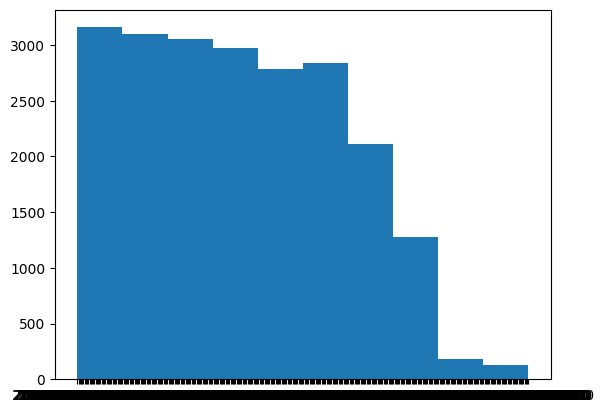

--------------------------------------------------
price


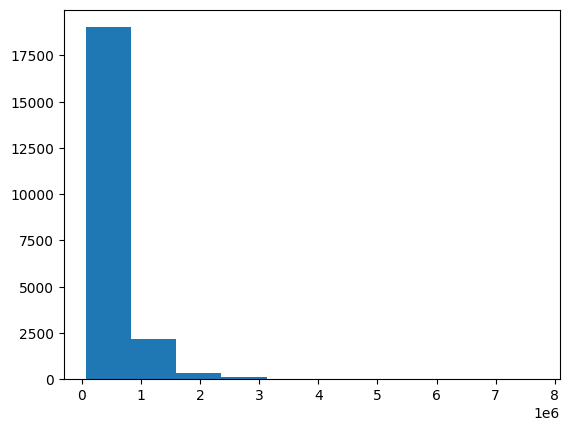

--------------------------------------------------
bedrooms


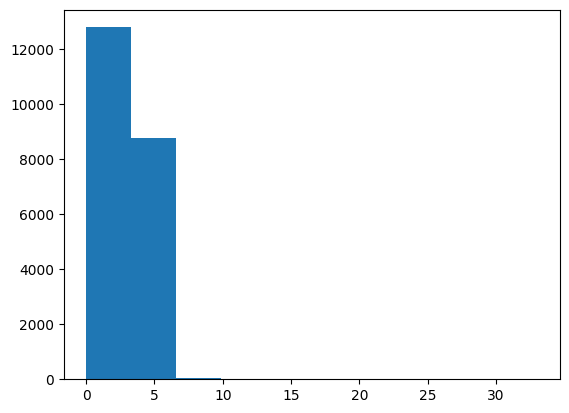

--------------------------------------------------
bathrooms


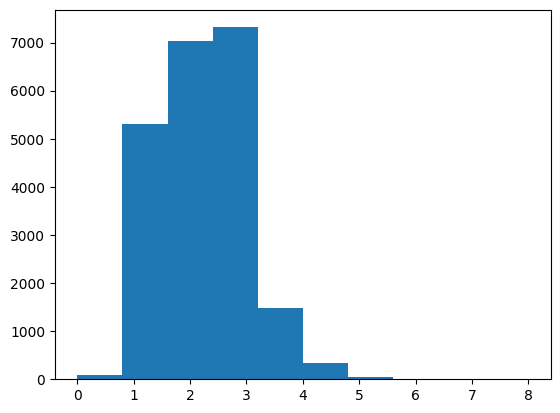

--------------------------------------------------
sqft_living


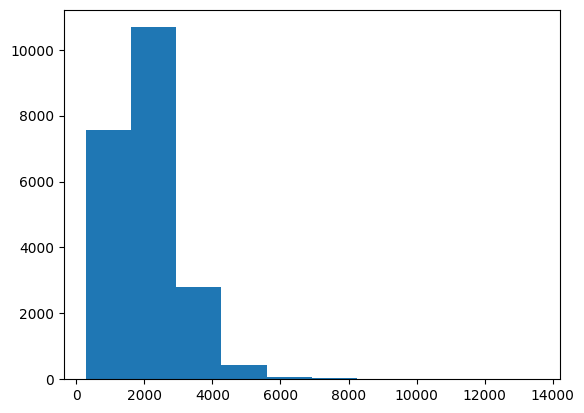

--------------------------------------------------
sqft_lot


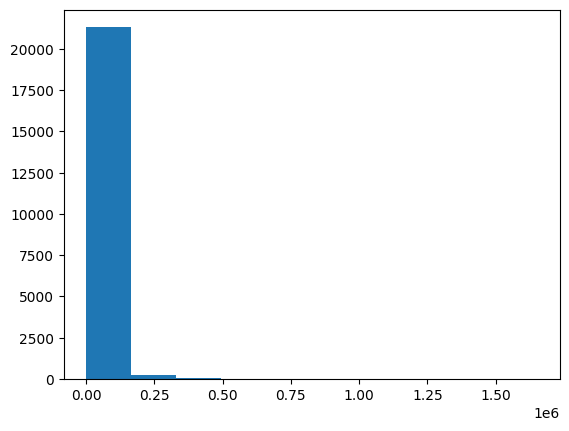

--------------------------------------------------
floors


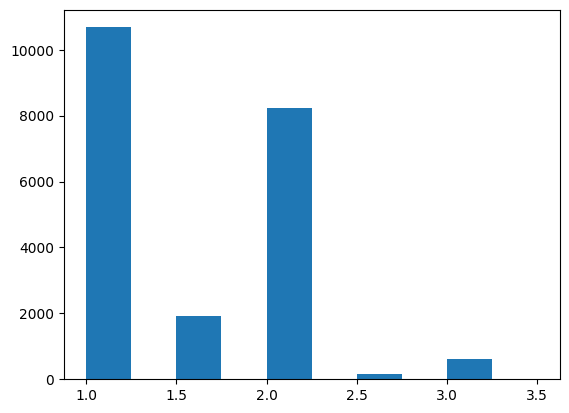

--------------------------------------------------
waterfront


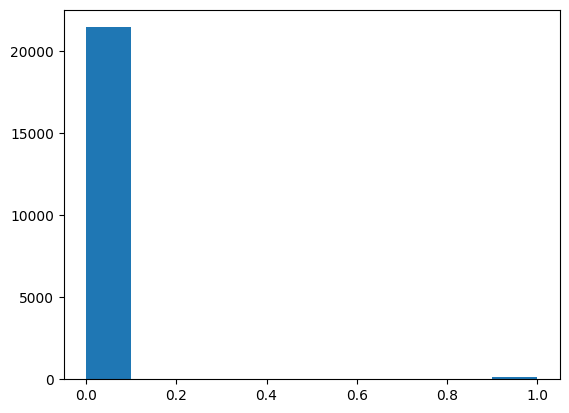

--------------------------------------------------
view


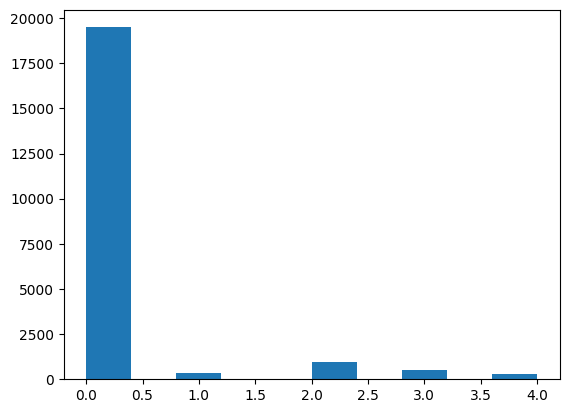

--------------------------------------------------
condition


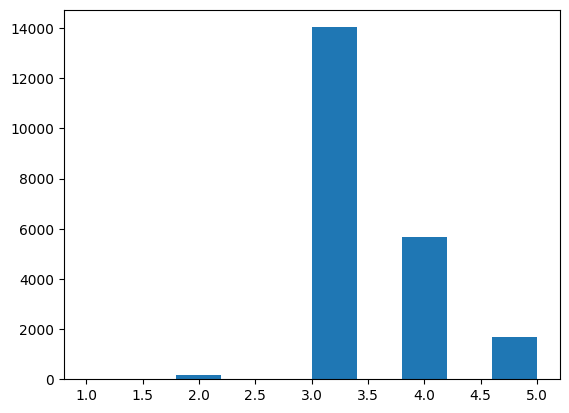

--------------------------------------------------
grade


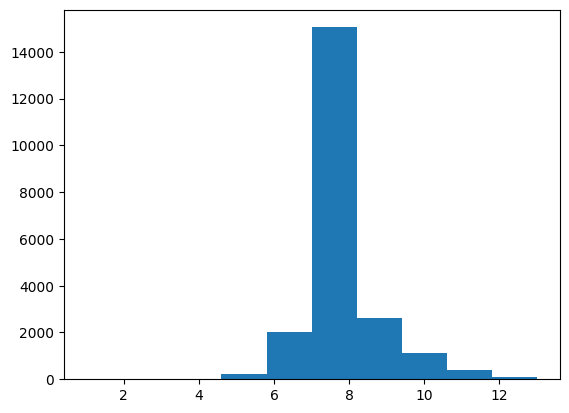

--------------------------------------------------
sqft_above


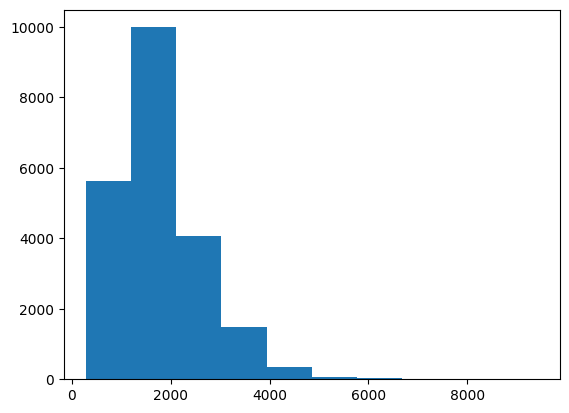

--------------------------------------------------
sqft_basement


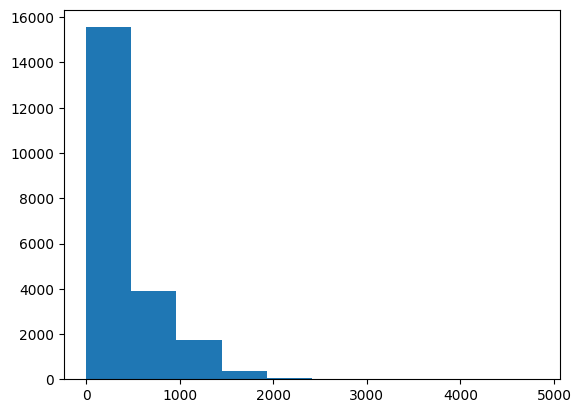

--------------------------------------------------
yr_built


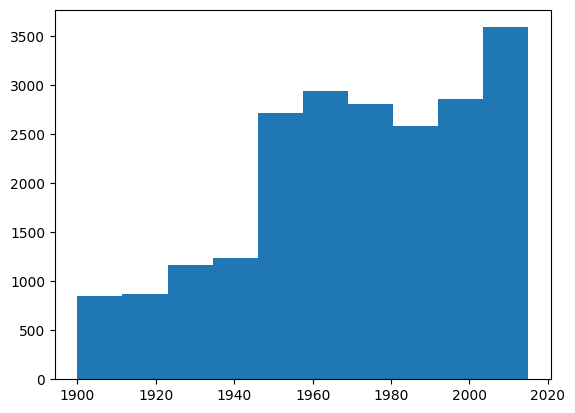

--------------------------------------------------
yr_renovated


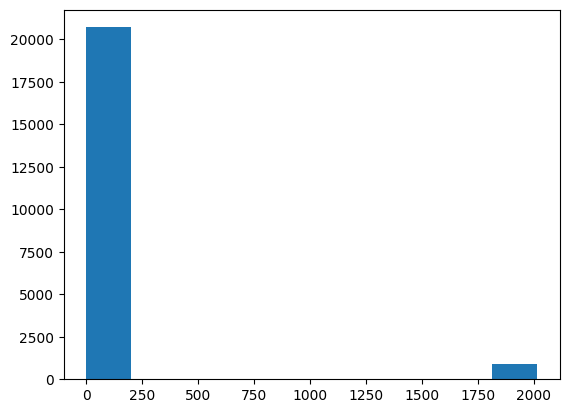

--------------------------------------------------
zipcode


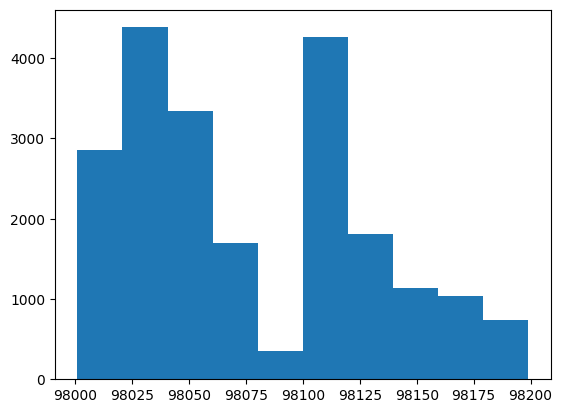

--------------------------------------------------
lat


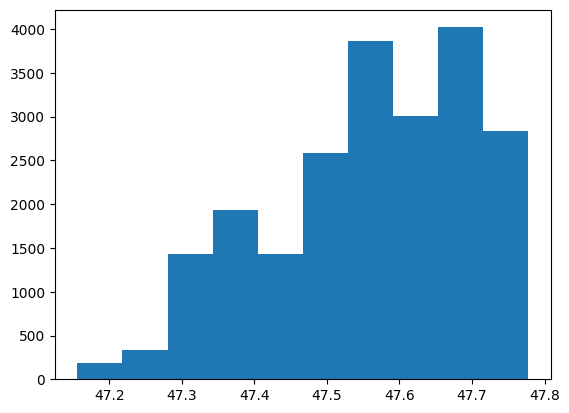

--------------------------------------------------
long


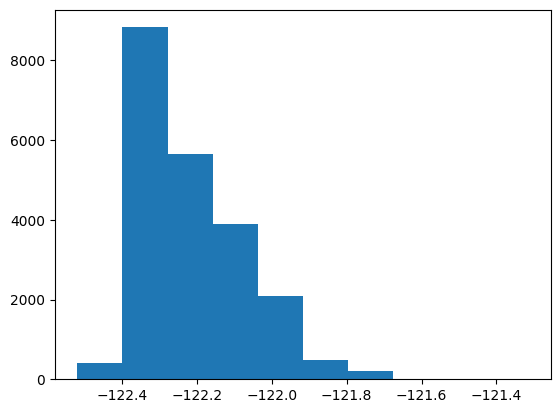

--------------------------------------------------
sqft_living15


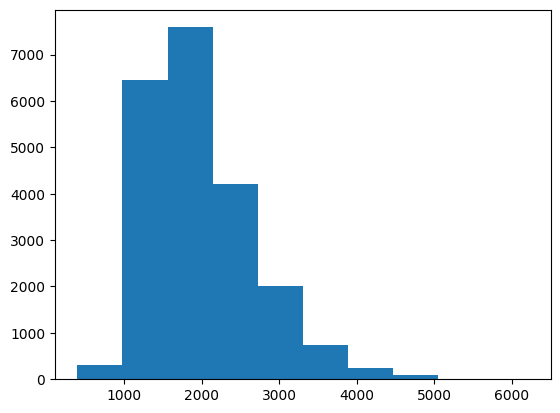

--------------------------------------------------
sqft_lot15


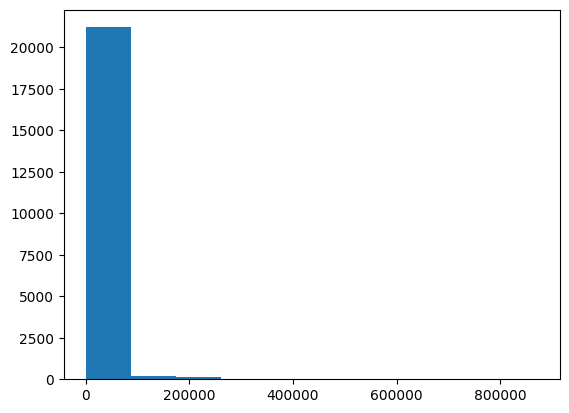

In [9]:
for f in df.columns:
  if(f != 'id'):
    print('-'*50)
    print(f)
    plt.hist(df[f])
    plt.show()


--------------------------------------------------
date


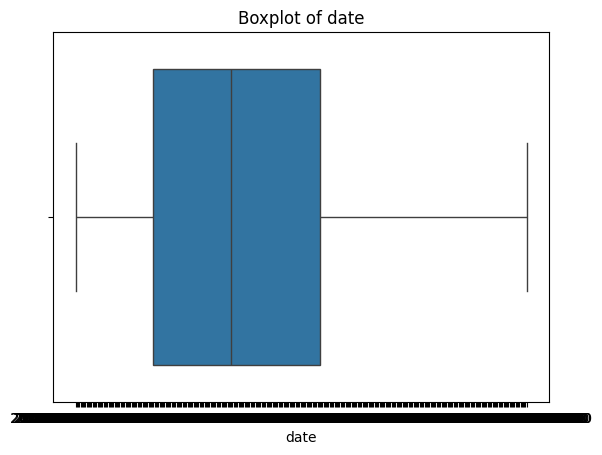

--------------------------------------------------
price


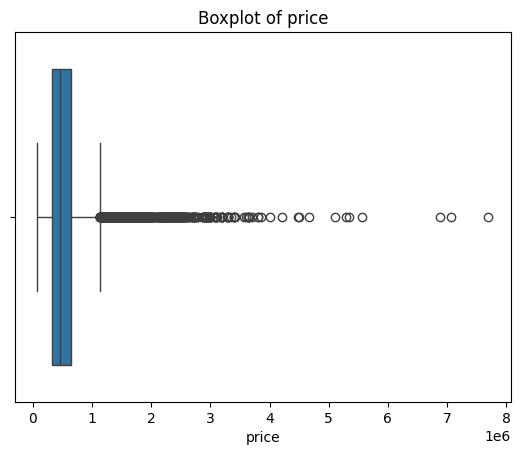

--------------------------------------------------
bedrooms


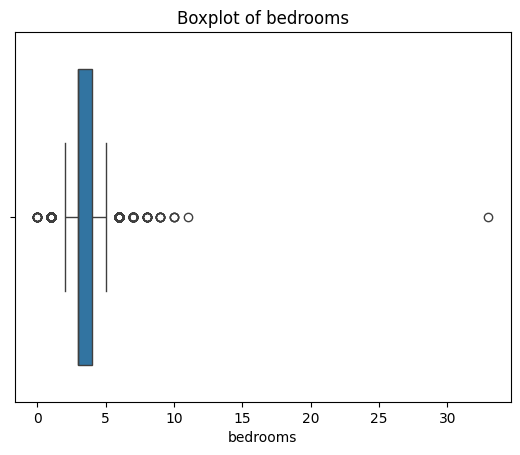

--------------------------------------------------
bathrooms


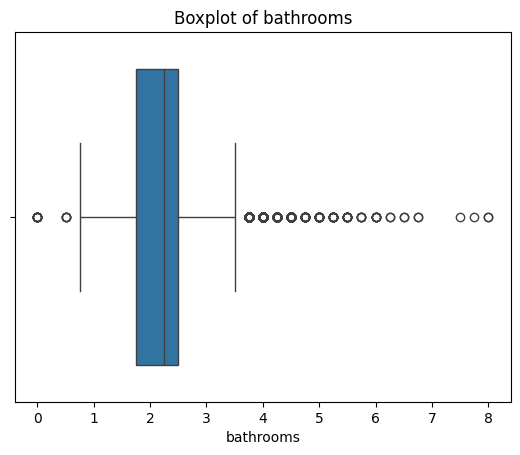

--------------------------------------------------
sqft_living


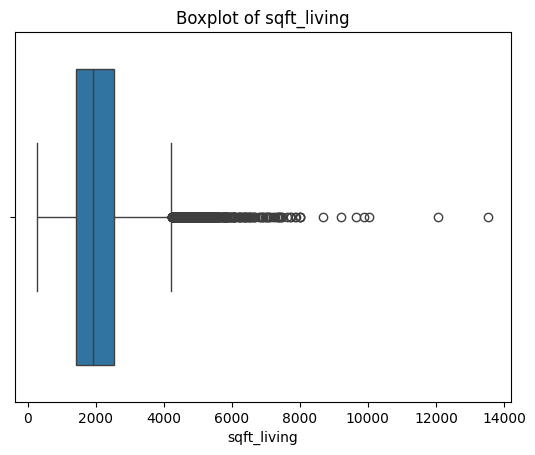

--------------------------------------------------
sqft_lot


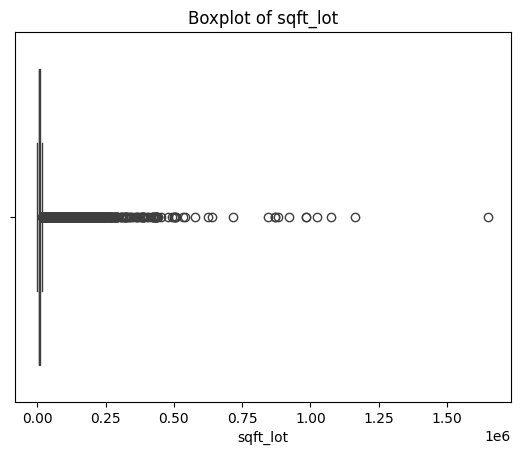

--------------------------------------------------
floors


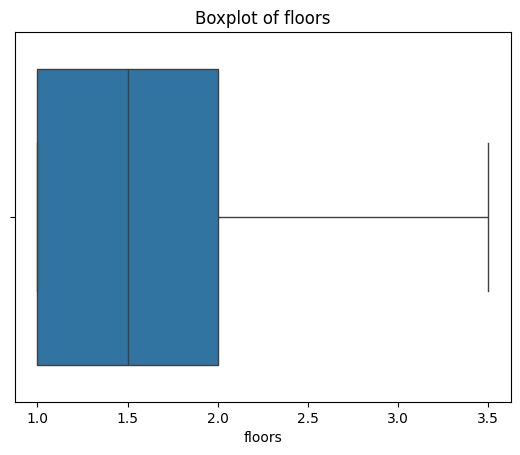

--------------------------------------------------
waterfront


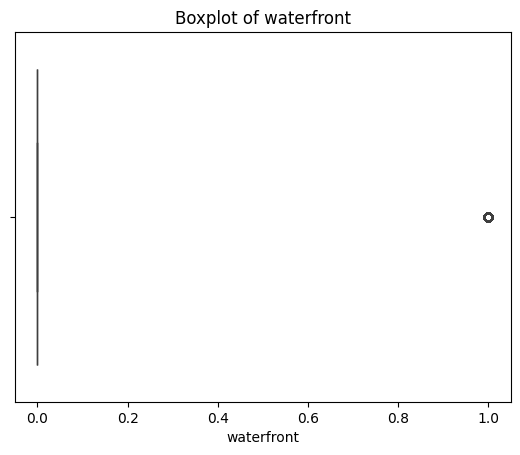

--------------------------------------------------
view


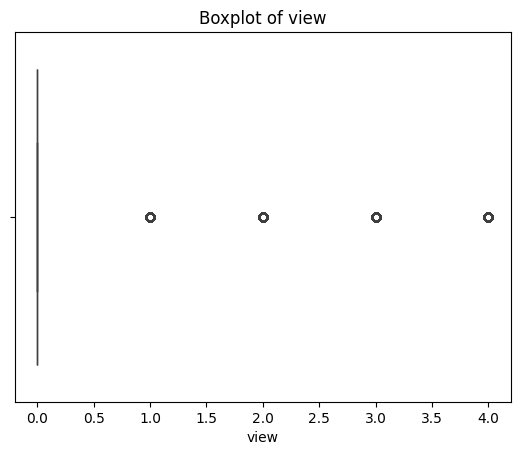

--------------------------------------------------
condition


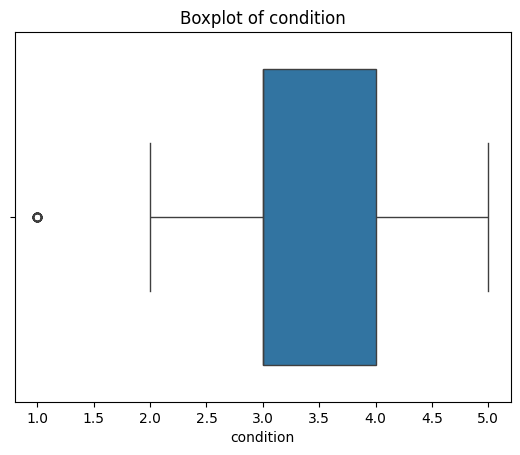

--------------------------------------------------
grade


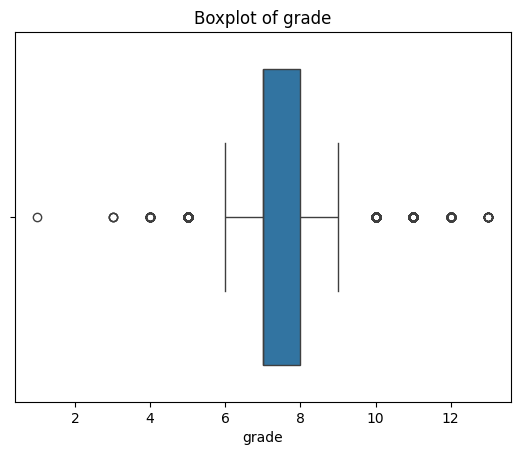

--------------------------------------------------
sqft_above


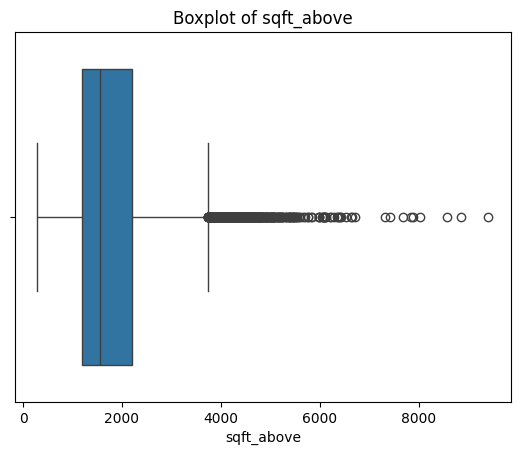

--------------------------------------------------
sqft_basement


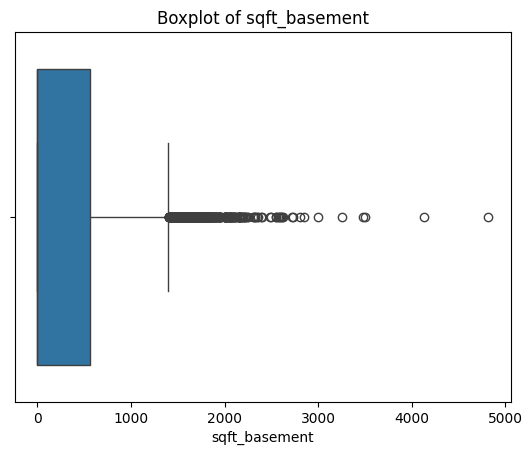

--------------------------------------------------
yr_built


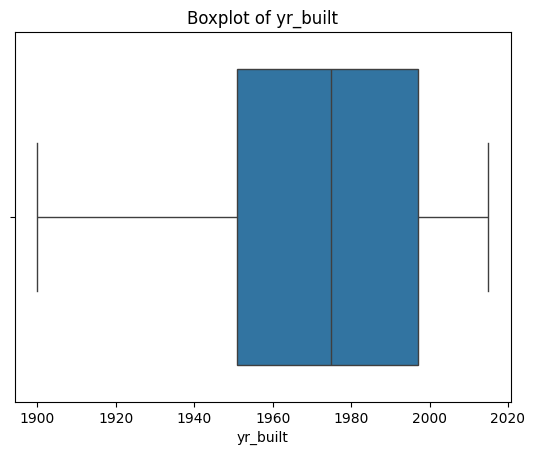

--------------------------------------------------
yr_renovated


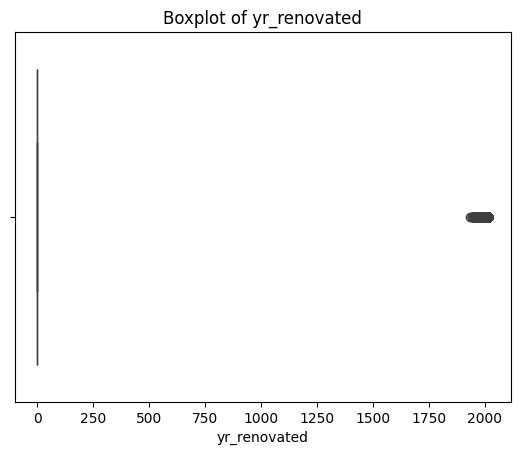

--------------------------------------------------
zipcode


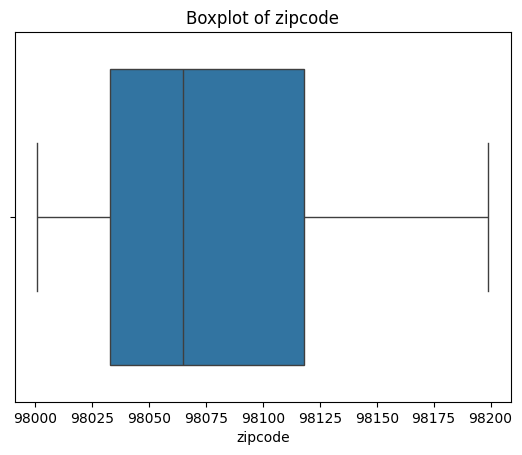

--------------------------------------------------
lat


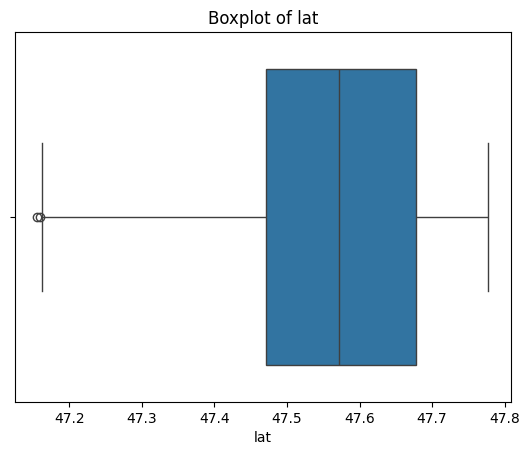

--------------------------------------------------
long


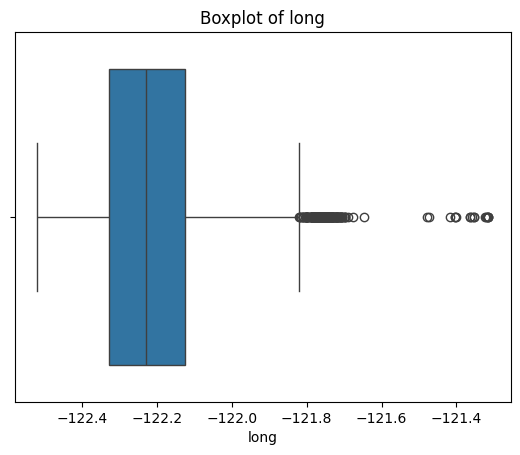

--------------------------------------------------
sqft_living15


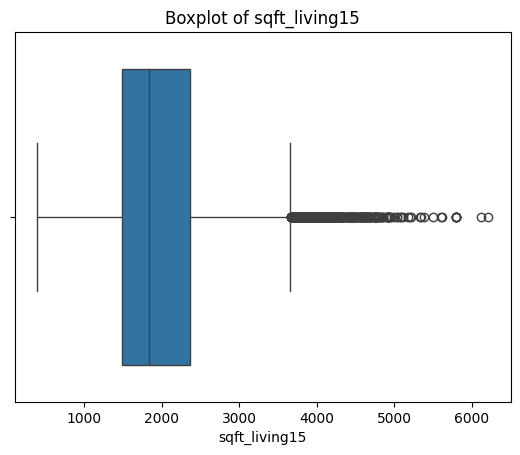

--------------------------------------------------
sqft_lot15


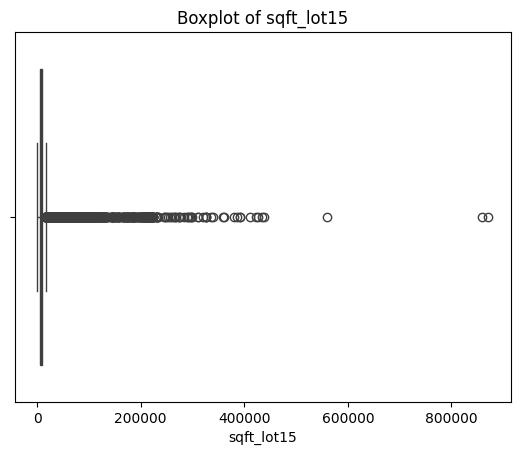

In [13]:
for f in df.columns:
  if(f!='id'):
    print('-'*50)
    print(f)
    sns.boxplot(x=df[f])
    plt.title(f"Boxplot of {f}")
    plt.show()